In [7]:
from __future__ import division
from math import log, exp, tan, atan, pi, ceil
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import time
import scipy.spatial as spatial
from mayavi import mlab
# mlab.init_notebook()
import glob
from termcolor import colored
import re
import scipy.io as sio
from scipy.interpolate import InterpolatedUnivariateSpline
import shdom
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid

%matplotlib notebook

In [52]:
import collections

FILE_TO_ANALYZE  = '../vadim/Memory_usage_tests/toanalyze.txt'
if os.path.exists(FILE_TO_ANALYZE):
    # Open a file
    f = open(FILE_TO_ANALYZE, "r")
    scat_lines = f.readlines()
    # Close opend file
    f.close()
    LIST_LENGTH = len(scat_lines)

num_mu_list = [2,4,8,16]
num_phi_list = [4,8,16,32]
ANGULAR_RES = [a*b for a,b in zip(num_mu_list,num_phi_list)]

start_from_index = 4
end_index = start_from_index + 1
IFSHOW = False


# order: d_nstf, d_agf, d_ANGULAR, d_data.

d_nstf = collections.OrderedDict()
for num_sh_term_factor in [0.1,0.2,0.3,0.5,1,1.5,2.5,5]:
    

    for high_order_radiance in [True]: # it is faster to use it True
        for del_source in [False]: # it is faster to use it False
            # max bm:
            for max_total_mb in [320000.0]:
                # adapt_grid_factor 
                
                d_agf = collections.OrderedDict()
                for adapt_grid_factor in [1.1,1.5,2,2.5,3,3.5,4,5]:
                    

                    fx_list = [21,31,61,81,101,121,152]
                    fy_list = [21,31,61,81,101,121,252]
                    fz_list = [21,31,61,67,67,67,67]

                    origin_list =  [[0.2, 0.2, 0.91],\
                                    [0.3, 0.3, 1.34333],\
                                    [0.6, 0.6, 2.64333],\
                            [0.8, 0.8, 2.9033],\
                            [1, 1, 2.90333],\
                            [1.2, 1.2, 2.90333],\
                            [1.5, 2.5, 2.90333]]

                    fov_list = [85.4187799, 105.4187799, 85.41877, 96.27356, \
                                108.59441, 118.08409, 147.86411]

                    lookat_list = [[0.21, 0.21, 0.56],\
                                   [0.31, 0.31, 0.826667],\
                                   [0.61, 0.61, 1.62667],\
                            [0.81, 0.81, 1.78667],\
                            [1.01, 1.01, 1.78667],\
                            [1.21, 1.21, 1.78667],\
                            [1.52, 2.52, 1.78667]]
                    # -------------------------------------------------------------
                    # -------------------------------------------------------------
                    # -------------------------------------------------------------
                    fx_list = fx_list[start_from_index:end_index]
                    fy_list = fy_list[start_from_index:end_index]
                    fz_list = fz_list[start_from_index:end_index]
                    origin_list = origin_list[start_from_index:end_index]
                    fov_list = fov_list[start_from_index:end_index]
                    lookat_list = lookat_list[start_from_index:end_index]


                    # without railight:
                    
                    # -------------------------------------------------------------
                    # -------------------------------------------------------------
                    # -------------------------------------------------------------
                    #start_from_index = 3
                    #end_index = 4

                    

                    for fx,fy,fz,origin,fov,lookat in zip(fx_list,fy_list,fz_list,origin_list,fov_list,lookat_list):
                        
                        d_ANGULAR = collections.OrderedDict()
                        for num_mu,num_phi in zip(num_mu_list,num_phi_list):
                            
                            

                            this_name = 'help_tamar_cvpr{}x{}x{}'.format(fx,fy,fz)
                            this_name = this_name + '_HOR' if high_order_radiance else this_name
                            this_name = this_name + '_DS' if del_source else this_name
                            this_name = this_name + '_ADF{}'.format(int(adapt_grid_factor))
                            this_name = this_name + '_MTB{}'.format(int(1e-3*max_total_mb))
                            this_name = this_name + '_DS' if del_source else this_name
                            this_name = this_name + '_NSTF{}E-1'.format(int(10*num_sh_term_factor))
                            this_name = this_name + '_MU{}PHI{}'.format(num_mu,num_phi)
    
    
                            output_dir = '../vadim/experiments/{}/monochromatic'.format(this_name)
        
                            if os.path.exists(output_dir):
                                S = '1'
                                # parsing part:
                                if os.path.exists(FILE_TO_ANALYZE):
                                    
                            
                                    for line_index, line in enumerate(scat_lines):
                                        S = '1'
                                        if("--{}x{}x{}--".format(fx,fy,fz) in line):
                                            srate_index = line_index
                                            S = S + '0'
                                            if("adapt_grid_factor = {}".format(adapt_grid_factor) in scat_lines[srate_index+3]):
                                                #print(scat_lines[srate_index+3])
                                                S = S + '0'
                                            if("num_sh_term_factor = {}".format(num_sh_term_factor) in scat_lines[srate_index+6]):
                                                #print(scat_lines[srate_index+6])
                                                S = S + '0'
                                            if("MU={}, PHI={}".format(num_mu,num_phi) in scat_lines[srate_index+7]):
                                                #print(scat_lines[srate_index+7])
                                                S = S + '0'
                                            
                                            new_list = scat_lines[srate_index+8:min(LIST_LENGTH,srate_index+200)]
                                            #print(S)
                                            if(S == '10000'):
                                                SS = 0
                                                for in_line_index, in_line in enumerate(new_list):
                                                    #print(in_line)
                                                    if('--- the wantmem variable after REDUCE in Mib' in in_line):
                                                        g_wantmem = re.findall(
                                                            '--- the wantmem variable after REDUCE in Mib is  *(\d*.\d*)', in_line)[0]
                                                        assert g_wantmem in in_line, "Problem in g_wantmem line"  
                                                        g_wantmem = int(float(g_wantmem))
                                                        SS = SS + 1 
                                                        
                                                    if('Elapsed: ' in in_line):
                                                        g_time = re.findall(
                                                        'Elapsed: *(\d*.\d*)', in_line)[0]
                                                        assert g_time in in_line, "Problem in g_time line" 
                                                        g_time = shdom.float_round(float(g_time))
                                                        SS = SS + 1 
                                                        

                                                    if(" 382 " in in_line):
                                                        g_get_medium = re.findall('382 *\d*.\d* MiB *(\d*.\d*) MiB *', in_line)[0]
                                                        assert g_get_medium in in_line, "Problem in get_medium line"
                                                        g_get_medium = shdom.float_round(float(g_get_medium))
                                                        SS = SS + 1 
                                                        

                                                    if(" 383 " in in_line):
                                                        g_get_solver = re.findall('383 *\d*.\d* MiB *(\d*.\d*) MiB *', in_line)[0]
                                                        assert g_get_solver in in_line, "Problem in g_get_solver line"
                                                        g_get_solver = shdom.float_round(float(g_get_solver))
                                                        SS = SS + 1 
                                                        

                                                    if(" 384 " in in_line):
                                                        g_rte_solve = re.findall('384 *\d*.\d* MiB *(\d*.\d*) MiB *', in_line)[0]
                                                        assert g_rte_solve in in_line, "Problem in g_get_solver line"   
                                                        g_rte_solve = shdom.float_round(float(g_rte_solve))
                                                        SS = SS + 1 
                                                        

                                                    if(" 385 " in in_line):
                                                        g_render = re.findall('385 *\d*.\d* MiB *(\d*.\d*) MiB *', in_line)[0]
                                                        assert g_render in in_line, "Problem in g_get_solver line"
                                                        g_render = shdom.float_round(float(g_render))
                                                        SS = SS + 1 
                                                        

                                                
#                                                         print("wantmem is {}\nRTESOLVE is {}\nTime is {}\nPer voxel is {}\n".format(
#                                                             g_wantmem,g_rte_solve,g_time,(1e6*g_wantmem/(fx*fy*fz*1.048576))))
                                                    
                                                        # order: d_nstf, d_agf, d_ANGULAR, d_data.
                                                        d_data = collections.OrderedDict()
            
                                                        d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
                                                        d_data['profile'] = g_rte_solve/1.048576 # convert to Mbyte
                                                        d_data['time'] = g_time
                                                        d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
                                                        d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)

                                                        # calculate error:
                                                        # load the measurments to see the rendered images:
                                                        measurements = shdom.load_forward_model_measurements(output_dir)
                                                        # A Measurements object bundles together the imaging geometry and sensor measurements for later optimization.
                                                        USED_CAMERA = measurements.camera
                                                        RENCERED_IMAGES = measurements.images
                                                        original_image = RENCERED_IMAGES[0]
                                                        
#                                                         epsilon = np.linalg.norm((original_image - gt_image), 2) / np.linalg.norm(gt_image,2)
                                                        epsilon = np.linalg.norm((original_image - gt_image), 2)
                                                        d_data['error']=epsilon
                                                        d_ANGULAR[num_mu*num_phi] = d_data
        
                                                        break          
                                                                  
                                                
                                    
       
                                # load the measurments to see the rendered images:
                                measurements = shdom.load_forward_model_measurements(output_dir)
                                # A Measurements object bundles together the imaging geometry and sensor measurements for later optimization.
                                USED_CAMERA = measurements.camera
                                RENCERED_IMAGES = measurements.images
                                original_image = RENCERED_IMAGES[0]
                                if(IFSHOW):

                                    f, ax = plt.subplots(1, 1, figsize=(8, 8))
                                    ax.imshow(original_image,cmap='gray')
                                    ax.invert_xaxis() 
                                    ax.invert_yaxis() 
                                    ax.axis('off')
                                    ax.set_title(this_name)
               
                    d_agf[adapt_grid_factor] = d_ANGULAR
                

                
    d_nstf[num_sh_term_factor] = d_agf
    
plt.show()

Define what is the gt_image and use it to calculate the image error.

gt_image = ?

<IPython.core.display.Javascript object>


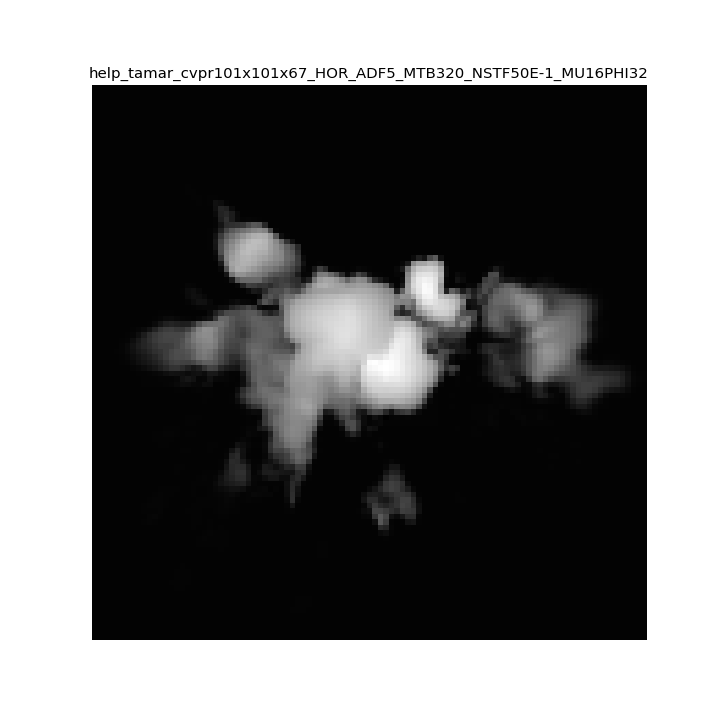

In [53]:
output_dir = '../vadim/experiments/help_tamar_cvpr101x101x67_HOR_ADF5_MTB320_NSTF5E-1_MU16PHI32/monochromatic'
# load the measurments to see the rendered images:
measurements = shdom.load_forward_model_measurements(output_dir)
last_name = this_name
# A Measurements object bundles together the imaging geometry and sensor measurements for later optimization.
USED_CAMERA = measurements.camera
RENCERED_IMAGES = measurements.images
gt_image = RENCERED_IMAGES[0]

f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(gt_image,cmap='gray')
ax.invert_xaxis() 
ax.invert_yaxis() 
ax.axis('off')
ax.set_title(last_name)

    
plt.show()

<IPython.core.display.Javascript object>


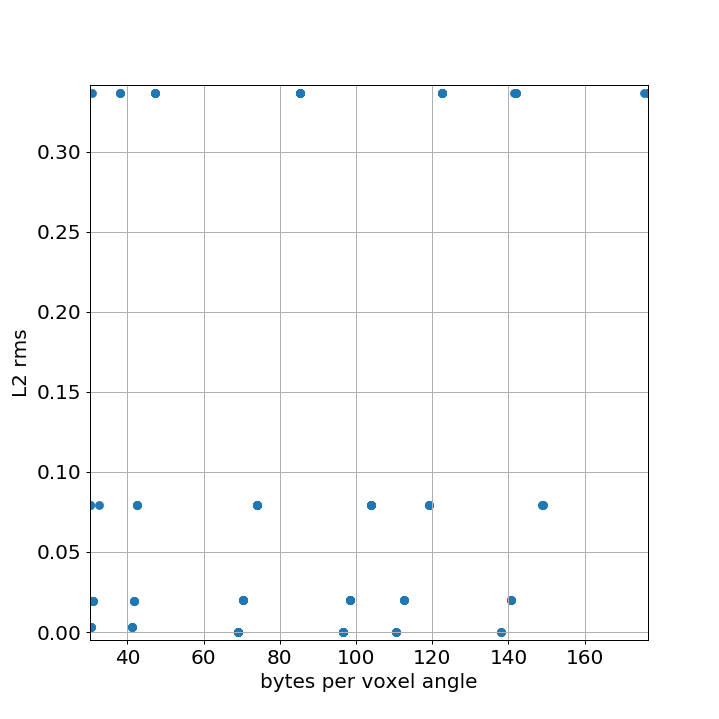

In [57]:
# show data:
"""
d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
d_data['profile'] = g_rte_solve/1.048576 # convert to Mbyte
d_data['time'] = g_time
d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)
d_data['error']=0
"""
# order: d_nstf, d_agf, d_ANGULAR, d_data.
x = []
y = []
f, ax = plt.subplots(1, 1, figsize=(8, 8))
for k_nstf in d_nstf.keys():
    
    d_agf = d_nstf[k_nstf]
    for k_agf in d_agf.keys():
        d_ANGULAR = d_agf[k_agf]
        
        
        for k_angular in d_ANGULAR.keys():
            d_data = d_ANGULAR[k_angular]
#             print(k_nstf,k_agf,k_angular,1e6*d_data['per_voxel_angle'],1e6*d_data['per_voxel'],d_data['time']/60)
               
#             x.append(1e6*d_data['per_voxel'])
            x.append(1e6*d_data['per_voxel_angle'])
#             y.append(d_data['time']/60)
            y.append(d_data['error'])
    
    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.scatter(x, y)
plt.grid(True)
# plt.xlabel("bytes per voxel", fontsize=16)# sinse x axis is wavelengths*1e3
plt.xlabel("bytes per voxel angle", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.ylabel("time [min]", fontsize=16)
plt.ylabel("L2 rms", fontsize=16)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

# Changing C:

<IPython.core.display.Javascript object>


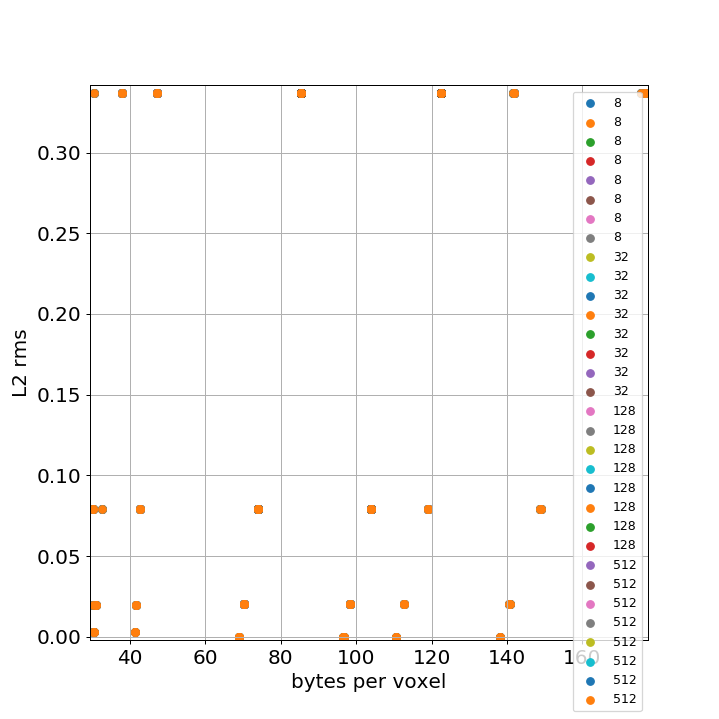

In [61]:
# show data:
"""
d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
d_data['profile'] = g_rte_solve/1.048576 # convert to Mbyte
d_data['time'] = g_time
d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)
d_data['error']=0
"""
# order: d_nstf, d_agf, d_ANGULAR, d_data.
x = []
y = []
f, ax = plt.subplots(1, 1, figsize=(8, 8))

for k_angular in ANGULAR_RES:
    
    for k_nstf in d_nstf.keys():

        d_agf = d_nstf[k_nstf]
        for k_agf in d_agf.keys():
            d_ANGULAR = d_agf[k_agf]


            if(k_angular in d_ANGULAR.keys()):
                
                d_data = d_ANGULAR[k_angular]
    #             print(k_nstf,k_agf,k_angular,1e6*d_data['per_voxel_angle'],1e6*d_data['per_voxel'],d_data['time']/60)

    #             x.append(1e6*d_data['per_voxel'])
                x.append(1e6*d_data['per_voxel_angle'])
    #             y.append(d_data['time']/60)
                y.append(d_data['error'])
        
        plt.scatter(x, y,label='{}'.format(k_angular))

    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.grid(True)
plt.xlabel("bytes per voxel", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.xlabel("adaptive grid factor", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.ylabel("time [min]", fontsize=16)
plt.ylabel("L2 rms", fontsize=16)
plt.legend()

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

# Changing adaptive grid:

<IPython.core.display.Javascript object>


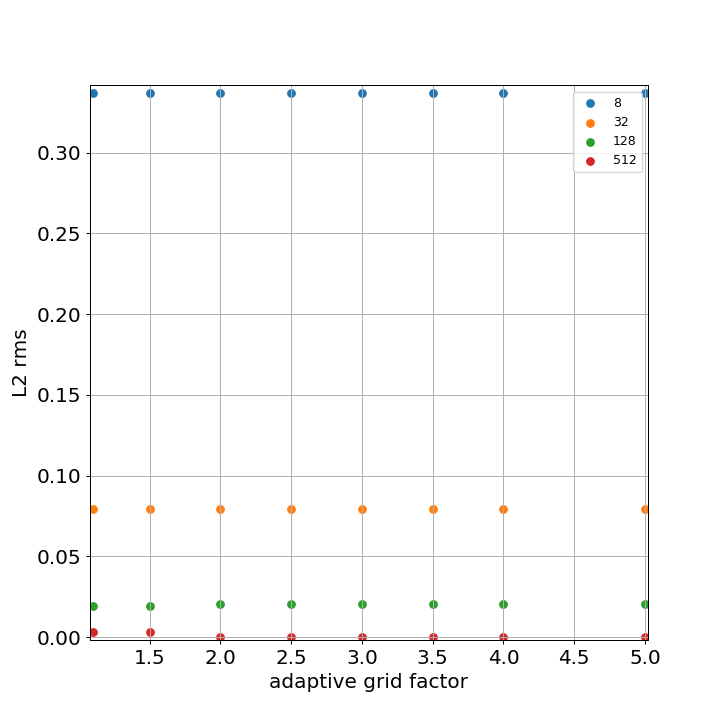

In [56]:
# show data:
"""
d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
d_data['profile'] = g_rte_solve/1.048576 # convert to Mbyte
d_data['time'] = g_time
d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)
d_data['error']=0
"""
# order: d_nstf, d_agf, d_ANGULAR, d_data.

f, ax = plt.subplots(1, 1, figsize=(8, 8))
k_nstf =0.2

for k_angular in ANGULAR_RES:
    
    x = []
    y = []

    d_agf = d_nstf[k_nstf]
    for k_agf in d_agf.keys():
        d_ANGULAR = d_agf[k_agf]
        d_data = d_ANGULAR[k_angular]


        x.append(k_agf)
    #             x.append(1e6*d_data['per_voxel_angle'])
    #             y.append(d_data['time']/60)
        y.append(d_data['error'])

    
    plt.scatter(x, y,label='{}'.format(k_angular))
    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.grid(True)
# plt.xlabel("bytes per voxel", fontsize=16)# sinse x axis is wavelengths*1e3
plt.xlabel("adaptive grid factor", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.ylabel("time [min]", fontsize=16)
plt.ylabel("L2 rms", fontsize=16)
plt.legend()

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

# chnging ANGULAR RES

<IPython.core.display.Javascript object>


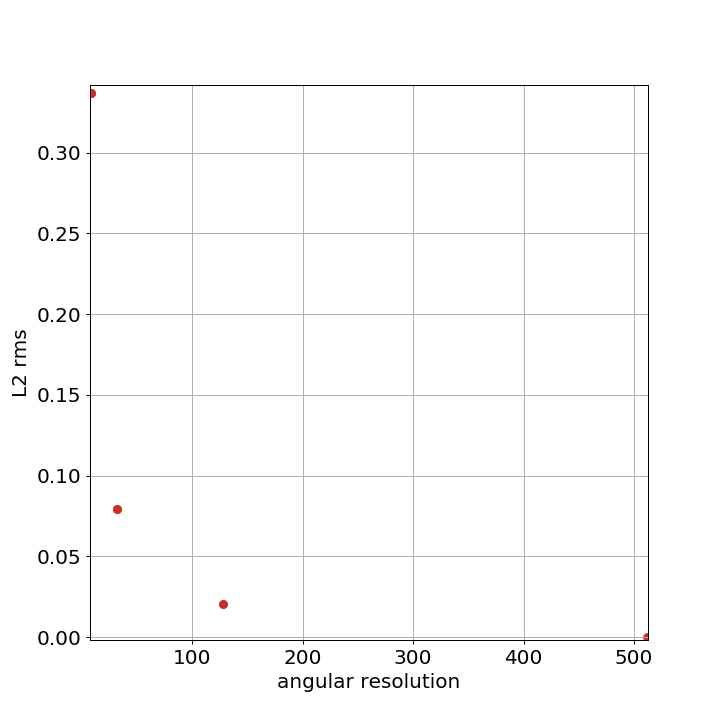

In [55]:
# show data:
"""
d_data['wantmem'] = g_wantmem/1.048576 # convert to Mbyte
d_data['profile'] = g_rte_solve/1.048576 # convert to Mbyte
d_data['time'] = g_time
d_data['per_voxel'] = d_data['profile']/(fx*fy*fz)
d_data['per_voxel_angle'] = d_data['profile']/((fx*fy*fz)*num_mu*num_phi)
d_data['error']=0
"""
# order: d_nstf, d_agf, d_ANGULAR, d_data.

f, ax = plt.subplots(1, 1, figsize=(8, 8))
k_nstf =0.2
k_agf = 5
x = []
y = []
for k_angular in ANGULAR_RES:
    
    

    d_agf = d_nstf[k_nstf]
    d_ANGULAR = d_agf[k_agf]
    d_data = d_ANGULAR[k_angular]


    x.append(k_angular)
#             x.append(1e6*d_data['per_voxel_angle'])
#             y.append(d_data['time']/60)
    y.append(d_data['error'])

    
    plt.scatter(x, y,label='{}'.format(k_angular))
    
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.grid(True)
# plt.xlabel("bytes per voxel", fontsize=16)# sinse x axis is wavelengths*1e3
plt.xlabel("angular resolution", fontsize=16)# sinse x axis is wavelengths*1e3
# plt.ylabel("time [min]", fontsize=16)
plt.ylabel("L2 rms", fontsize=16)


plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

In [43]:
d_ANGULAR

OrderedDict()

In [44]:
d_ANGULAR.keys()

odict_keys([])